In [2]:
import numpy  as np
import pandas as pd
import json

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score

In [3]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [4]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

,Revenue,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Free Cash Flow,Market Cap,Enterprise Value,Working Capital,2019 PRICE VAR [%],Class
Name,,,,,,,,,,,,,,,,,,,,,
Comcast Corporation,6.323475,-0.316696,16.416107,-0.158625,17.261727,17.384583,11.478611,14.515810,9.775665,8.563799,...,18.551872,-6.246506,-7.472656,15.388109,9.286260,7.256458,9.706136,-4.157145,0.272457,0.766672
Sirius XM Holdings Inc.,0.030446,-0.108048,0.288030,0.791809,0.060087,0.099691,0.746462,1.084121,0.643699,0.377755,...,-0.046505,-1.333279,-0.184554,-0.769809,0.909300,0.919989,0.897186,-1.822499,0.101756,0.766672
"Caesars Entertainment, Inc.",0.216274,0.061176,0.420518,-0.158625,0.271835,0.506456,0.132946,5.275000,-0.182470,-0.577006,...,0.204339,-0.095345,0.281416,0.252015,-0.134760,-0.098078,0.505200,-0.059603,1.295726,0.766672
Ford Motor Company,10.992098,12.854323,2.262109,-0.158625,2.793410,2.365166,1.663089,4.778454,2.582381,1.436007,...,1.502671,0.077599,-6.438625,0.015751,5.483897,1.167930,5.422933,12.746919,0.155944,0.766672
"NIKE, Inc.",2.202412,1.530728,2.501254,-0.158625,2.822662,2.390474,2.434371,-0.161760,2.581047,5.984218,...,-0.116395,-4.039938,-2.593975,-2.641791,2.835536,5.339784,4.032573,5.949899,0.359933,0.766672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Takung Art Co., Ltd.",-0.378199,-0.316463,-0.324211,-0.158625,-0.291735,-0.303959,-0.330107,-0.386579,-0.309281,-0.262339,...,-0.107708,0.278753,0.281416,0.085067,-0.330657,-0.320130,-0.332647,-0.234363,-0.732742,-1.304338
"Urban One, Inc.",-0.347661,-0.305365,-0.269683,-0.158625,-0.244763,-0.250644,-0.280242,-0.066377,-0.302374,-0.623371,...,-0.135538,0.267529,0.281416,0.042056,-0.275066,-0.315699,-0.294470,-0.197830,-0.315203,-1.304338
Vince Holding Corp.,-0.359470,-0.303067,-0.303684,-0.158625,-0.257098,-0.274074,-0.337347,-0.365681,-0.265166,-0.262579,...,-0.108338,0.314290,0.281416,0.100423,-0.346782,-0.316220,-0.327465,-0.215203,0.862381,0.766672


c:\users\trieu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\trieu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\trieu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\trieu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecat

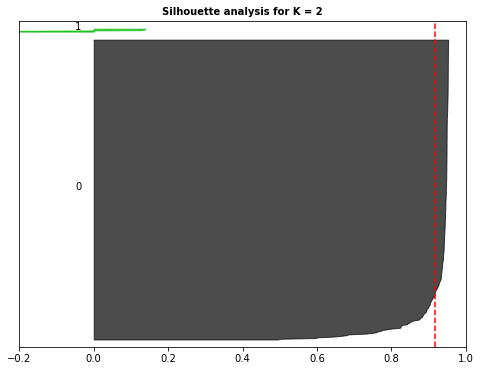

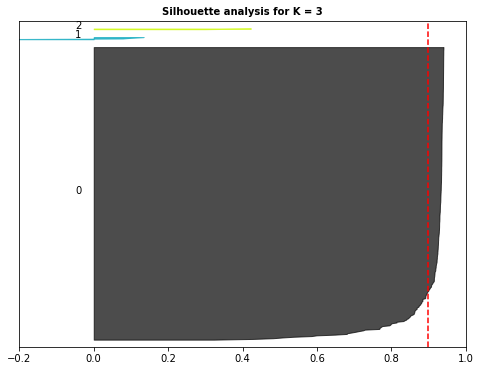

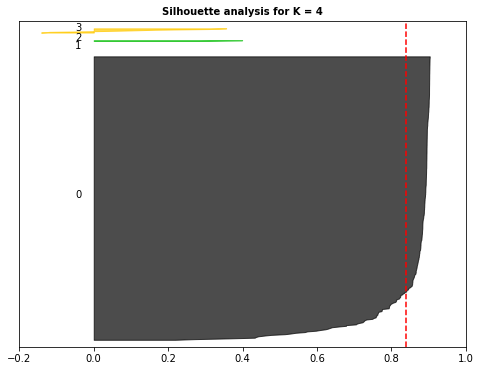

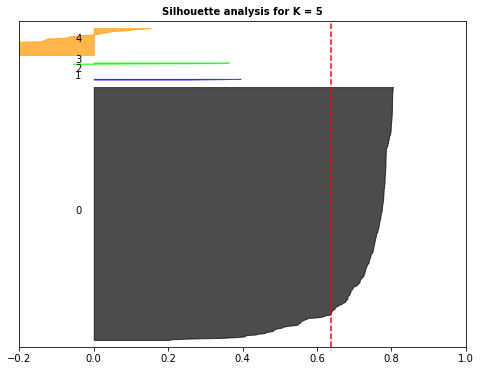

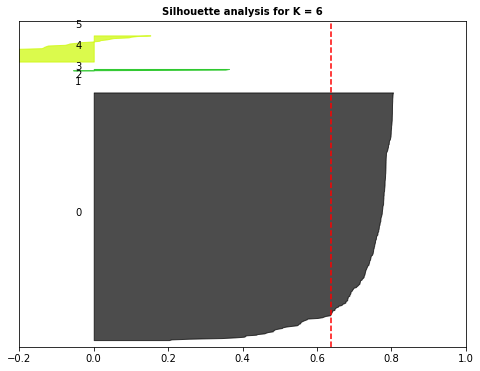

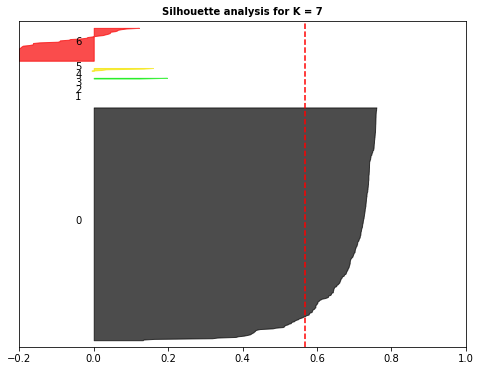

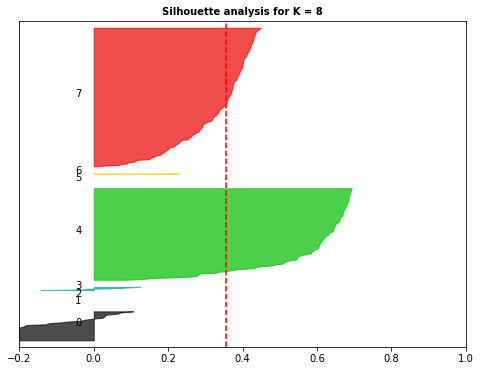

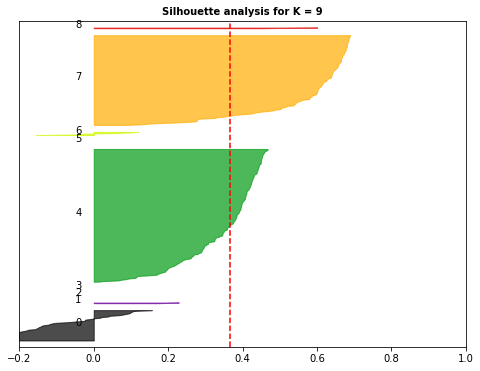

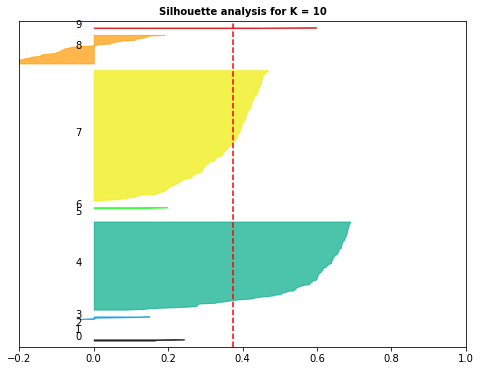

In [9]:
df = pd.read_csv("../processed_data/2018_Data_Accounts.csv")

# convert 'Name' column into row indices
df.set_index('Name', inplace=True)

# remove ticker column
df = df.drop(columns=['Ticker'])

# display
display(df)

k = 10
kmeans_results = run_KMeans(k, df)

# Plotting Silhouette Analysis
silhouette(kmeans_results, df, plot=True)

In [10]:
def get_top_features_cluster(tf_idf_array, idx, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster 
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores        
        best_features = [(idx[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['companies', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(10, 6))
    for i in range(0, len(dfs)):
        plt.title(("Companies in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'companies', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

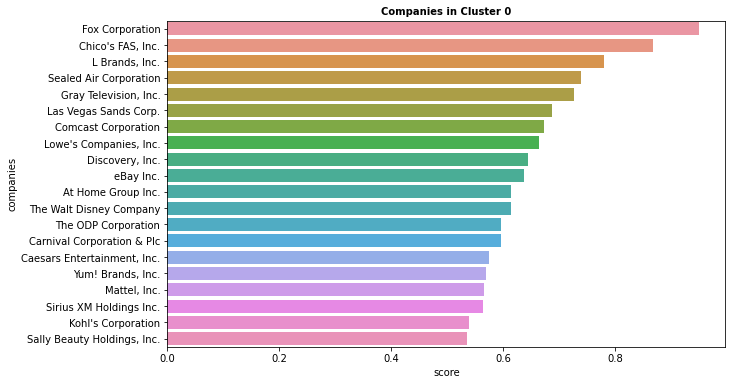

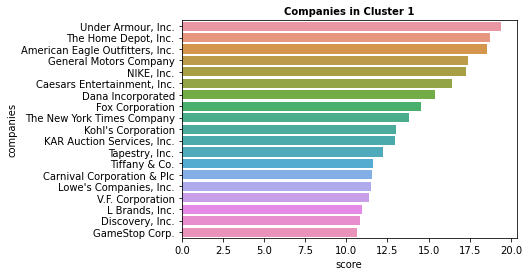

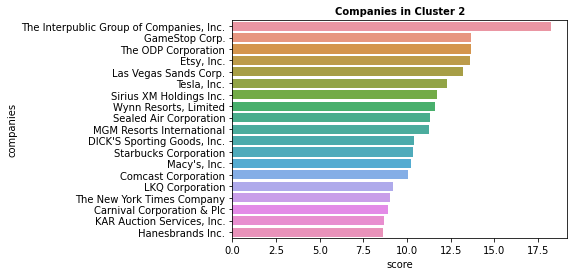

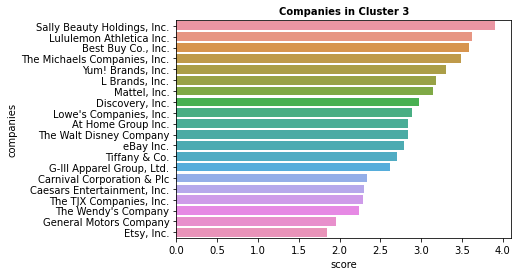

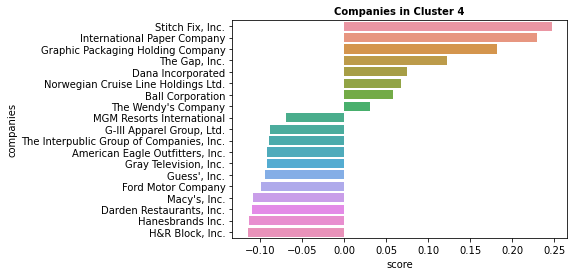

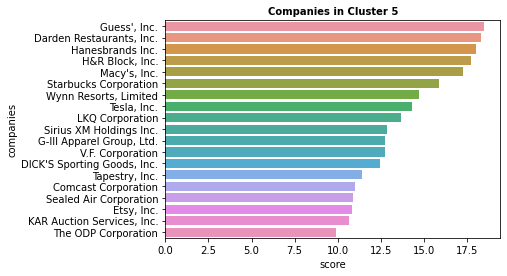

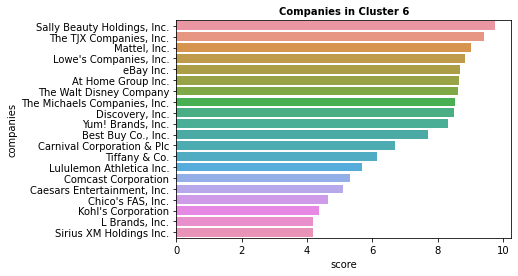

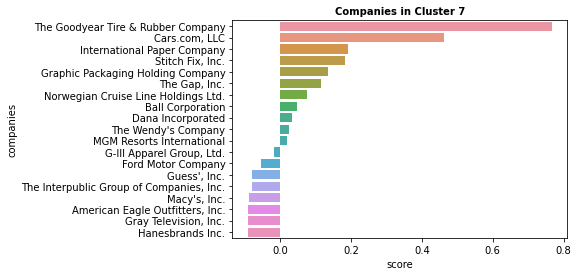

In [11]:
best_result = 8
kmeans = kmeans_results.get(best_result)

df_array = df.to_numpy()
dfi = df.index.to_numpy()

prediction = kmeans.predict(df)
n_feats = 20
dfs = get_top_features_cluster(df_array, dfi, prediction, n_feats)
plotWords(dfs, 20)